In [1]:
# Note to make the corrected rate vs radon plot
# The datasets: measured time, radon, corrected rate, error on rate, error on radon,
# A0 (starting activity) found from exponential fit and the found error on A0.

# NB!
# The txt files used here are all obtained-calculated in pyhton-notebook: radon_measurement_allData_expFit_paperPlot.ipynb
# So, first run radon_measurement_allData_expFit_paperPlot.ipynb

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib
import numpy as np
import scipy as scipy
import scipy.optimize as optimize

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [2]:
# Define functions we will need later

# NEW for errors:
def err(arr):
    return np.sqrt(sum(n*n for n in arr))/len(arr)

# sample variance (= average value of deviations) G.F. Knoll p.69
def dev(exp_mean, meas_points):
    return np.sqrt((sum((exp_mean - meas_points) ** 2))/(len(meas_points)-1))

# Define a linear function to fit the rate vs radon data with.
def lin_func(x, a, b):
    return b + a*x

# Define a straight line to fit the rate vs radon data with.
def line_func(x, a):
    return a*np.ones(len(x))

# Chi2 fit tester:
def chi2(measured, errors_measured, fit):
    return sum(((measured-fit)**2)/(errors_measured**2))

# Beautifull recursive defaultdict so that automatically all calls that do not excist return a new empty dict
from collections import defaultdict
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

In [3]:
# Load txt files with data-arrays of temperature, time and radon
temperature_radon = np.loadtxt("temperature_radon_measurement")
temperature_radon_error = np.loadtxt("temperature_error_radon_measurement")
ti44pk0_time = np.loadtxt("ti44pk0_time")
ti44pk0_radon = np.loadtxt("ti44pk0_radon")
ti44pk0_error_radon = np.loadtxt("ti44pk0_error_radon")

# Download arrays with:  
# the measured rate,  
# corrected rate (corrected_rate = measured_rate - exponential_fit + A0, thus corrected for exponential decay),
# the error on the rate
# and an array with the starting value rate (A0) found by the exponential fit and the error on A0
ti44pk0_rate = np.loadtxt("ti44pk0_rate")
ti44pk0_corr_rate = np.loadtxt('ti44pk0_corrected_rate')
ti44pk0_error_rate =  np.loadtxt('ti44pk0_error_rate')
foundA0_and_error = np.loadtxt('ti44pk0_foundFitA0_and_Error')

time_array_radon = np.arange(0., len(ti44pk0_radon), 1.)

In [4]:
# Calculate time error, due to different way of collecting data between LabView & Rad7

step_time_rad7 = {}
step_time_lv = {}
for i in range(12):
    step_time_rad7[i] = {}
    step_time_lv[i] = {}

step_time_lv[0] = ti44pk0_time[0:24]
step_time_lv[1] = ti44pk0_time[24:48]
step_time_lv[2] = ti44pk0_time[48:71]
step_time_lv[3] = ti44pk0_time[71:95]
step_time_lv[4] = ti44pk0_time[95:120]
step_time_lv[5] = ti44pk0_time[120:170]
step_time_lv[6] = ti44pk0_time[170:218]
step_time_lv[7] = ti44pk0_time[218:319]

step_time_rad7[0] = time_array_radon[0:23]
step_time_rad7[1] = time_array_radon[23:46]
step_time_rad7[2] = time_array_radon[46:69]
step_time_rad7[3] = time_array_radon[69:91]
step_time_rad7[4] = time_array_radon[91:114]
step_time_rad7[5] = time_array_radon[114:161]
step_time_rad7[6] = time_array_radon[161:206]
step_time_rad7[7] = time_array_radon[206:301]


In [5]:
step_err_time = {}
array_err_time = []
for i in range(12):
    step_err_time[i] = (len(step_time_lv[i])-len(step_time_rad7[i]))/2.
    array_err_time.append(step_err_time[i])

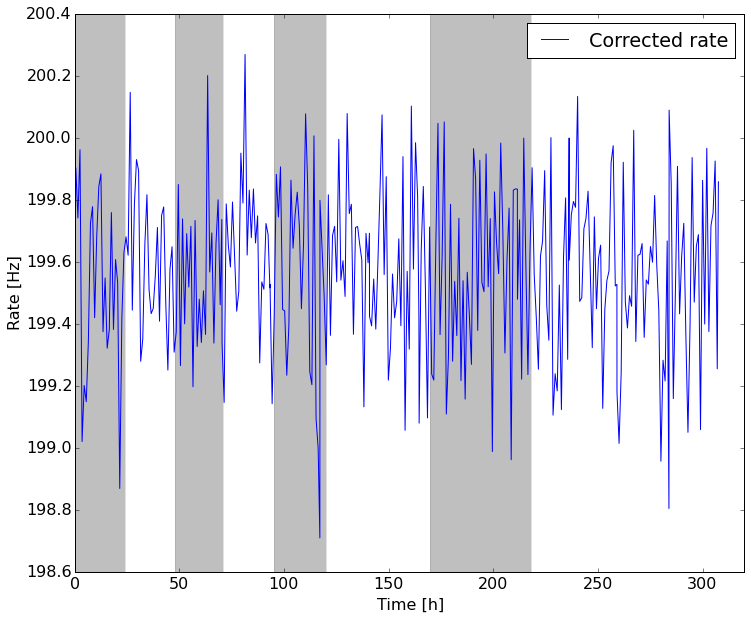

C:\Users\Dorine\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


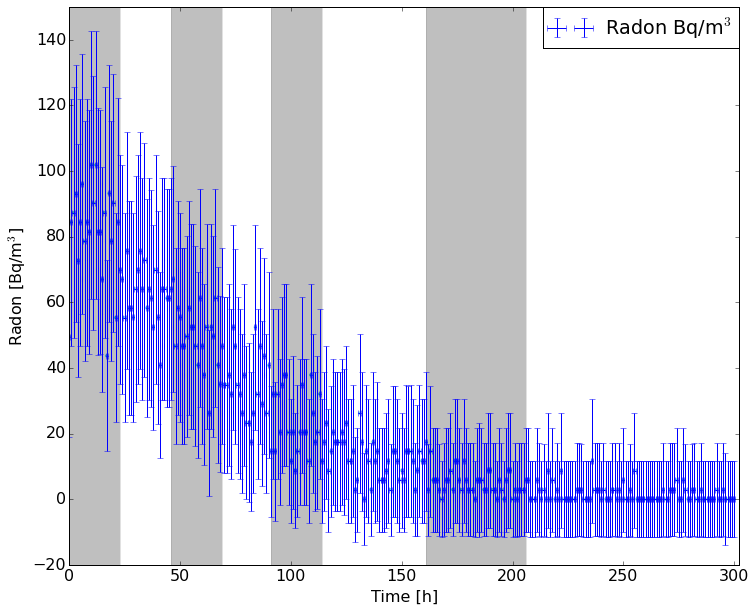

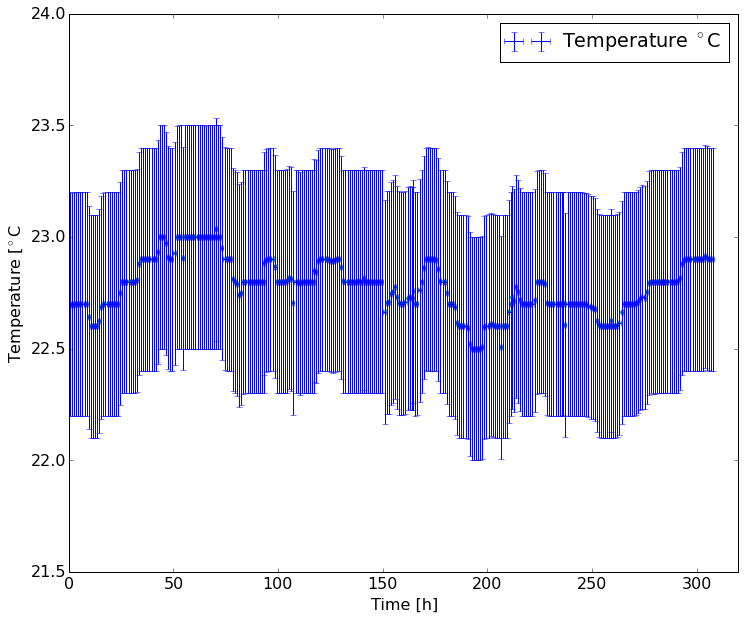

In [6]:
# Plot the two datasets used for the corrected rate vs radon plot. 
# Show in shaded (grey) the parts of the dataset that are used for the corrected rate vs radon plot.

#Plot corrected rate vs time (measured rate can be added)
plt.xlabel('Time [h]')
plt.ylabel('Rate [Hz]')
plt.plot(ti44pk0_time, ti44pk0_corr_rate, label = 'Corrected rate')
plt.axvspan(0, 24, alpha=0.5, color='grey')
plt.axvspan(24, 48, alpha=0.5, color='white')
plt.axvspan(48, 71, alpha=0.5, color='grey')
plt.axvspan(71, 95, alpha=0.5, color='white')
plt.axvspan(95, 120, alpha=0.5, color='grey')
plt.axvspan(120, 170, alpha=0.5, color='white')
plt.axvspan(170, 218, alpha=0.5, color='grey')
plt.axvspan(218, 319, alpha=0.5, color='white')
plt.xlim(0,320)   
plt.legend()
plt.savefig('timeVScorrRate_Ti_511keV.png', format='png', dpi=300)
plt.savefig('timeVScorrRate_Ti_511keV.pdf', format='pdf', dpi=300)
plt.show()

# Plot radon vs time for the measurement
plt.xlabel('Time [h]')
plt.ylabel('Radon [Bq/m$^{3}$]')
plt.errorbar(time_array_radon, ti44pk0_radon, xerr=0.5, yerr=ti44pk0_error_radon,fmt=None, marker=None, label = 'Radon Bq/m$^{3}$')
plt.scatter(time_array_radon, ti44pk0_radon, color='c', marker='.', edgecolors='none', s=45)
plt.axvspan(0, 23, alpha=0.5, color='grey')
plt.axvspan(23, 46, alpha=0.5, color='white')
plt.axvspan(46, 69, alpha=0.5, color='grey')
plt.axvspan(69, 91, alpha=0.5, color='white')
plt.axvspan(91, 114, alpha=0.5, color='grey')
plt.axvspan(114, 161, alpha=0.5, color='white')
plt.axvspan(161, 206, alpha=0.5, color='grey')
plt.axvspan(206, 301, alpha=0.5, color='white')
plt.xlim(0,302) 
plt.ylim(-20,150)
plt.legend(loc=1, borderaxespad=0.)
plt.savefig('timeVSradon_Ti_511keV_shaded.png', format='png', dpi=300)
plt.savefig('timeVSradon_Ti_511keV_shaded.pdf', format='pdf', dpi=300)
plt.show()

#Plot temperature vs time (to check whether effects seen are actually due to changes in temperature)
plt.xlabel('Time [h]')
plt.ylabel('Temperature [$^{\circ}$C')
plt.errorbar(ti44pk0_time, temperature_radon, xerr=0.5, yerr=temperature_radon_error,fmt=None, marker=None, label = 'Temperature $^{\circ}$C')
plt.scatter(ti44pk0_time, temperature_radon, color='c', marker='.', edgecolors='none', s=45)
plt.xlim(0,320)   
plt.legend()
plt.savefig('timeVStempRn_Ti_511keV.png', format='png', dpi=300)
plt.savefig('timeVStempRn_Ti_511keV.pdf', format='pdf', dpi=300)
plt.show()

In [7]:
# Get only the parts of the datasets with ~constant radon concentration. 
# The areas are chosen by eye. 

step_rate = {}
step_corr_rate = {}
step_err_rate = {}
step_temp = {}
step_err_temp = {}
step_radon = {}
step_err_radon = {}
for i in range(8):
    step_rate[i] = {}
    step_corr_rate[i] = {}
    step_err_rate[i] = {}
    step_temp[i] = {}
    step_err_temp[i] = {}
    step_radon[i] = {}
    step_err_radon[i] = {}
    
step_temp[0] = temperature_radon[0:24]
step_temp[1] = temperature_radon[24:48]
step_temp[2] = temperature_radon[48:71]
step_temp[3] = temperature_radon[71:95]
step_temp[4] = temperature_radon[95:120]
step_temp[5] = temperature_radon[120:170]
step_temp[6] = temperature_radon[170:218]
step_temp[7] = temperature_radon[218:319]

step_err_temp[0] = temperature_radon_error[0:24]
step_err_temp[1] = temperature_radon_error[24:48]
step_err_temp[2] = temperature_radon_error[48:71]
step_err_temp[3] = temperature_radon_error[71:95]
step_err_temp[4] = temperature_radon_error[95:120]
step_err_temp[5] = temperature_radon_error[120:170]
step_err_temp[6] = temperature_radon_error[170:218]
step_err_temp[7] = temperature_radon_error[218:319]

step_corr_rate[0] = ti44pk0_corr_rate[0:24]
step_corr_rate[1] = ti44pk0_corr_rate[24:48]
step_corr_rate[2] = ti44pk0_corr_rate[48:71]
step_corr_rate[3] = ti44pk0_corr_rate[71:95]
step_corr_rate[4] = ti44pk0_corr_rate[95:120]
step_corr_rate[5] = ti44pk0_corr_rate[120:170]
step_corr_rate[6] = ti44pk0_corr_rate[170:218]
step_corr_rate[7] = ti44pk0_corr_rate[218:319]

step_err_temp[0] = temperature_radon_error[0:24]
step_err_temp[1] = temperature_radon_error[24:48]
step_err_temp[2] = temperature_radon_error[48:71]
step_err_temp[3] = temperature_radon_error[71:95]
step_err_temp[4] = temperature_radon_error[95:120]
step_err_temp[5] = temperature_radon_error[120:170]
step_err_temp[6] = temperature_radon_error[170:218]
step_err_temp[7] = temperature_radon_error[218:319]

step_err_rate[0] = ti44pk0_error_rate[0:24]
step_err_rate[1] = ti44pk0_error_rate[24:48]
step_err_rate[2] = ti44pk0_error_rate[48:71]
step_err_rate[3] = ti44pk0_error_rate[71:95]
step_err_rate[4] = ti44pk0_error_rate[95:120]
step_err_rate[5] = ti44pk0_error_rate[120:170]
step_err_rate[6] = ti44pk0_error_rate[170:218]
step_err_rate[7] = ti44pk0_error_rate[218:319]


# Measured rate = uncorrected rate (not needed)
step_rate[0] = ti44pk0_rate[0:24]
step_rate[1] = ti44pk0_rate[24:48]
step_rate[2] = ti44pk0_rate[48:71]
step_rate[3] = ti44pk0_rate[71:95]
step_rate[4] = ti44pk0_rate[95:120]
step_rate[5] = ti44pk0_rate[120:170]
step_rate[6] = ti44pk0_rate[170:218]
step_rate[7] = ti44pk0_rate[218:319]


step_radon[0] = ti44pk0_radon[0:23]     
step_radon[1] = ti44pk0_radon[23:46]
step_radon[2] = ti44pk0_radon[46:69]
step_radon[3] = ti44pk0_radon[69:91]
step_radon[4] = ti44pk0_radon[91:114]
step_radon[5] = ti44pk0_radon[114:161]
step_radon[6] = ti44pk0_radon[161:206]
step_radon[7] = ti44pk0_radon[206:301]


step_err_radon[0] = ti44pk0_error_radon[0:23]
step_err_radon[1] = ti44pk0_error_radon[23:46]
step_err_radon[2] = ti44pk0_error_radon[46:69]
step_err_radon[3] = ti44pk0_error_radon[69:91]
step_err_radon[4] = ti44pk0_error_radon[91:114]
step_err_radon[5] = ti44pk0_error_radon[114:161]
step_err_radon[6] = ti44pk0_error_radon[161:206]
step_err_radon[7] = ti44pk0_error_radon[206:301]

In [8]:
# Make an array with the mean for the corrected rate & radon
# Determine the errors for combined radon datapoints
# Determine error of corrected rate based on the errors of the measured rate
# the error for the measured rate is the same as the error for the corrected rate

mean_radon_steps = recursive_defaultdict()
mean_temp_steps = recursive_defaultdict()
stdv_temp_steps = recursive_defaultdict()
mean_corr_rate_steps = recursive_defaultdict()
error_rate_steps = recursive_defaultdict()
mean_radon_steps_array = []
mean_temp_steps_array = []
stdv_temp_steps_array = []
mean_corr_rate_steps_array = []
error_rate_steps_array = []

error_radon_steps = recursive_defaultdict()
error_radon_steps_array = []

# For measured rate (not needed)
mean_rate_steps_array = []
mean_rate_steps = recursive_defaultdict()

for i in range(8):
    
    mean_corr_rate_steps[i] = np.mean(step_corr_rate[i])
    mean_corr_rate_steps_array.append(mean_corr_rate_steps[i])
    
    error_rate_steps[i] = err(step_err_rate[i])
    error_rate_steps_array.append(error_rate_steps[i])
    
    mean_temp_steps[i] = np.mean(step_temp[i])
    mean_temp_steps_array.append(mean_temp_steps[i])
    stdv_temp_steps[i] = np.std(step_temp[i])
    stdv_temp_steps_array.append(stdv_temp_steps[i])
    
    mean_radon_steps[i] = np.mean(step_radon[i])
    mean_radon_steps_array.append(mean_radon_steps[i])
    error_radon_steps[i] = err(step_err_radon[i])
    error_radon_steps_array.append(error_radon_steps[i])
    
    # For measured rate (not needed)    
    mean_rate_steps[i] = np.mean(step_rate[i])
    mean_rate_steps_array.append(mean_rate_steps[i])
    
# Make np.arrays insteas of lists
mean_temp_steps_array = np.array(mean_temp_steps_array)
stdv_temp_steps_array = np.array(stdv_temp_steps_array)
mean_radon_steps_array = np.array(mean_radon_steps_array)
mean_corr_rate_steps_array = np.array(mean_corr_rate_steps_array)
error_rate_steps_array = np.array(error_rate_steps_array)
error_radon_steps_array = np.array(error_radon_steps_array)
mean_rate_steps_array = np.array(mean_rate_steps_array)

In [9]:
# Correct rate for changes due to changes temperature 
# the value used (-0.0034) is found by temperature measurement given in Hz/C 

correction_factor = recursive_defaultdict()
correction_to_rate = recursive_defaultdict()
correction_to_rate_array = []

for i in range(8):
    correction_factor[i] = (mean_temp_steps_array[0]-(mean_temp_steps_array[i]))
    correction_to_rate[i] = correction_factor[i]*(-0.0034)
    correction_to_rate_array.append(correction_to_rate[i])

# Correct the corrected rate array for these temperature changes
mean_corr_rate_steps_array = mean_corr_rate_steps_array + correction_to_rate_array

In [10]:
# Use curve_fit to fit linear function to corrected rate
ab_guess_corr_rate = [0., mean_corr_rate_steps_array[0]]
(a_fit_corr_rate, b_fit_corr_rate), pcov_corr_rate = optimize.curve_fit(
lin_func, mean_radon_steps_array, mean_corr_rate_steps_array, ab_guess_corr_rate, error_rate_steps_array, True)
perr_corr_rate = np.sqrt(np.diag(pcov_corr_rate))

# and to measured rate (not needed)
ab_guess_rate = [0., mean_rate_steps_array[0]]
(a_fit_rate, b_fit_rate), pcov_rate = optimize.curve_fit(
lin_func, mean_radon_steps_array, mean_rate_steps_array, ab_guess_rate, error_rate_steps_array, True)
perr_rate = np.sqrt(np.diag(pcov_rate))

# Make an array for the radon concentration to use for the fit
radon_fit = np.linspace(min(mean_radon_steps_array), max(mean_radon_steps_array), 1000)

In [11]:
chi2_corr = chi2(mean_corr_rate_steps_array, error_rate_steps_array, lin_func(mean_radon_steps_array, a_fit_corr_rate, b_fit_corr_rate))/7
chi2_meas = chi2(mean_rate_steps_array, error_rate_steps_array, lin_func(mean_radon_steps_array, a_fit_rate, b_fit_rate))/7

In [12]:
# Use curve_fit to fit straight line to corrected rate
a2_guess_corr_rate = [0.]
(a2_fit_corr_rate), pcov_corr_rate2 = optimize.curve_fit(
line_func, mean_radon_steps_array, mean_corr_rate_steps_array, a2_guess_corr_rate, error_rate_steps_array, True)
perr2_corr_rate = np.sqrt(np.diag(pcov_corr_rate2))

# and to measured rate (not needed)
a2_guess_rate = [0.]
(a2_fit_rate), pcov_rate2 = optimize.curve_fit(
line_func, mean_radon_steps_array, mean_rate_steps_array, a2_guess_rate, error_rate_steps_array, True)
perr2_rate = np.sqrt(np.diag(pcov_rate2))

In [13]:
chiA2_corr = chi2(mean_corr_rate_steps_array, error_rate_steps_array, line_func(mean_radon_steps_array, a2_fit_corr_rate))/(len(mean_radon_steps_array)-1)
chiA2_meas = chi2(mean_rate_steps_array, error_rate_steps_array, line_func(mean_radon_steps_array, a2_fit_rate))/(len(mean_radon_steps_array)-1)

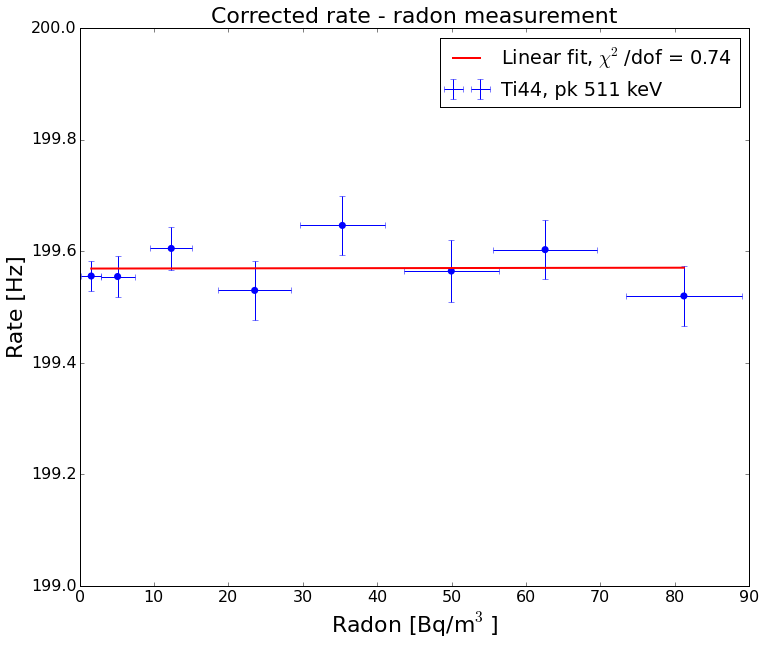

Linear fit Corrected Rate (ax+b) with a = 1.89640806365e-05 Hz/(Bq/m$^3$) +- 0.000579321095088, b = 199.568784765 Hz +- 0.0199977412718
Straight Line fit Measured Rate (b) with b = [ 199.56921942] Hz +- 0.000579321095088


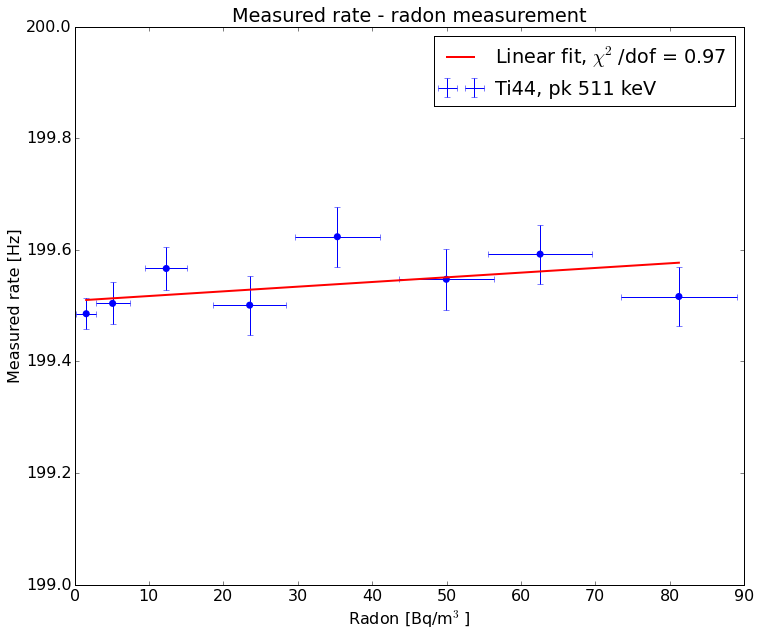

Linear fit Measured Rate (ax+b) with a = 0.000838329543878 Hz/(Bq/m$^3$) +- 0.000579814495503, b = 199.508952058 Hz +- 0.0200115118341
Straight Line fit Measured Rate (b) with b = [ 199.52816634] Hz +- 0.000579814495503


In [14]:
# Radon vs Rate
plt.title('Corrected rate - radon measurement', fontsize = 22)
plt.xlabel('Radon [Bq/m$^3$]', fontsize = 22)
plt.ylabel('Rate [Hz]', fontsize = 22)
plt.errorbar(mean_radon_steps_array, mean_corr_rate_steps_array, xerr=error_radon_steps_array, yerr=error_rate_steps_array,fmt=None, marker=None, label = 'Ti44, pk 511 keV')
plt.scatter(mean_radon_steps_array, mean_corr_rate_steps_array, marker='.', edgecolors='none', s=200)
plt.plot(radon_fit, lin_func(radon_fit, a_fit_corr_rate, b_fit_corr_rate), 'r-', linewidth =2., label = ('Linear fit, ${\chi}^2$/dof = %s' % round(chi2_corr,2)))
#plt.plot(radon_fit, line_func(radon_fit, a2_fit_corr_rate), 'g-', label = ('Straight line fit: b = 199.5692 $\pm$ 0.0006,\n ${\chi}^2$/dof = %s' % chiA2_corr))
plt.legend()
plt.xlim(0.,90.)
plt.ylim(199.,200.)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.savefig('radonVScorrRate_Ti_511keV_linFitPNG.png', format='png', dpi=300)
plt.savefig('radonVScorrRate_Ti_511keV_linFit.pdf', format='pdf', dpi=300)
plt.show()
print('Linear fit Corrected Rate (ax+b) with a = %s Hz/(Bq/m$^3$) +- %s, b = %s Hz +- %s' % (a_fit_corr_rate, perr_corr_rate[0], b_fit_corr_rate, perr_corr_rate[1]))
print('Straight Line fit Measured Rate (b) with b = %s Hz +- %s' % (a2_fit_corr_rate, perr_corr_rate[0]))

# Plot for the measured rate 
#(not needed, just to check and show the effect of correcting for exponential decay)
plt.title('Measured rate - radon measurement')
plt.xlabel('Radon [Bq/m$^3$]')
plt.ylabel('Measured rate [Hz]')
plt.errorbar(mean_radon_steps_array, mean_rate_steps_array, xerr=error_radon_steps_array, yerr=error_rate_steps_array, fmt=None, marker=None, label = 'Ti44, pk 511 keV')
plt.scatter(mean_radon_steps_array, mean_rate_steps_array, marker='.', edgecolors='none', s=200)
plt.plot(radon_fit, lin_func(radon_fit, a_fit_rate, b_fit_rate), 'r-', linewidth =2., label = ('Linear fit, ${\chi}^2$/dof = %s' % round(chi2_meas,2)))
#plt.plot(radon_fit, line_func(radon_fit, a2_fit_rate), 'g-', label = ('Straight line fit: b = 199.5282 $\pm$ 0.0006,\n ${\chi}^2$/dof = %s' % chiA2_meas))
plt.legend()
plt.xlim(0.,90.)
plt.ylim(199.,200.)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.savefig('radonVSmeasuredRate_Ti_511keV_linFitPNG.png', format='png', dpi=300)
plt.savefig('radonVSmeasuredRate_Ti_511keV_linFit.pdf', format='pdf', dpi=300)
plt.show()
print('Linear fit Measured Rate (ax+b) with a = %s Hz/(Bq/m$^3$) +- %s, b = %s Hz +- %s' % (a_fit_rate, perr_rate[0], b_fit_rate, perr_rate[1]))
print('Straight Line fit Measured Rate (b) with b = %s Hz +- %s' % (a2_fit_rate, perr_rate[0]))